In [37]:
from matplotlib import pyplot as plt
import numpy as np
import yaml

In [7]:
img_sizes= [(143,107), (160,120), (179,143)]
training_times = [6.896, 6.806, 8.077]
freeze_training_times = [2.425, 2.968 ,3.893]

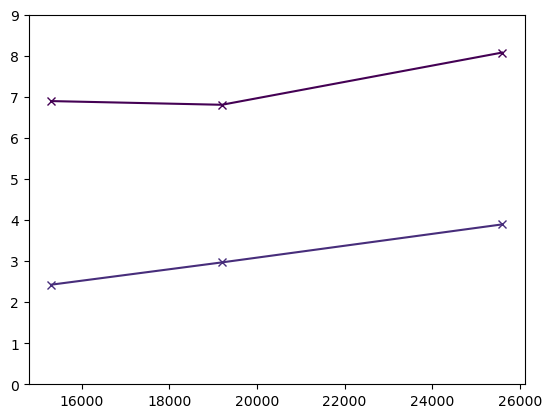

In [8]:
plt.plot([_size[0]*_size[1] for _size in img_sizes], training_times, marker='x')
plt.plot([_size[0]*_size[1] for _size in img_sizes], freeze_training_times, marker='x')
plt.ylim(0,9)
plt.show()

In [41]:
with open("../performance/conv_analysis/run03.txt", 'r') as f:
    times_dict = yaml.load(f, Loader=yaml.Loader)

In [42]:
times_dict.keys()

dict_keys(['args', 'channel_sizes', 'conv_backprop_times', 'conv_times', 'kernel_sizes', 'pool_times', 'times'])

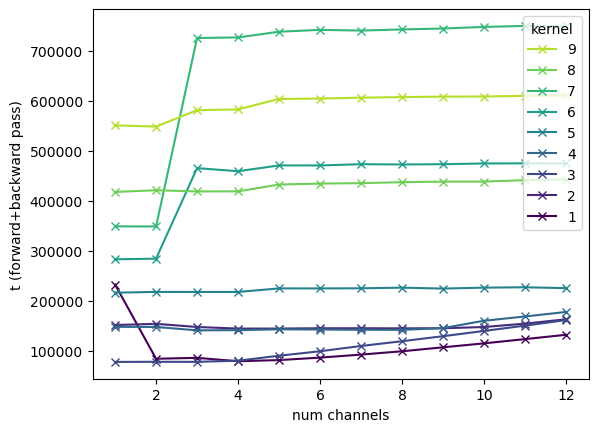

In [43]:
x = times_dict["channel_sizes"][:12]
y = times_dict["conv_backprop_times"][:9,:12].T
color = times_dict["kernel_sizes"][:9]
# np.array([[ 305252.,  290069.,  274970.,  305229.,  304473.,  356526.,
#          378479.,  421612.,  435046.,  466851.,  494028.],
#        [ 354726.,  337539.,  353425.,  368321.,  389997.,  406935.,
#          454358.,  463457.,  486747.,  519311.,  546699.],
#        [ 292937.,  433716.,  504481.,  540014.,  354609.,  384575.,
#          413357.,  440200.,  485820.,  517033.,  554990.],
#        [ 441243.,  554835.,  607719.,  889226.,  412349.,  436381.,
#          470289.,  486126.,  513198.,  547019.,  577037.],
#        [ 585781.,  651953.,  950866., 1031495.,  528473.,  546161.,
#          573316.,  594333.,  625429.,  642578.,  660761.],
#        [ 671451.,  780451., 1272516., 1405916.,  819688.,  845276.,
#          865030.,  881738.,  921517.,  948589.,  957245.],
#        [ 788361., 1108809., 1720757., 1956418., 1278531., 1306773.,
#         1327675., 1344546., 1385104., 1402072., 1430541.],
#        [ 885101., 1262122., 1558100., 1801431., 1044126., 1071242.,
#         1092831., 1121478., 1146945., 1169067., 1194868.]])
cm = plt.colormaps.get_cmap("viridis")
custom_cycler = (plt.cycler(color=[cm(k/len(color)) for k in range(len(color))]))
plt.rc('axes', prop_cycle=custom_cycler)
plt.plot(x, y, marker='x')
plt.xlabel("num channels")
plt.ylabel("t (forward+backward pass)")
plt.legend(color, title="kernel", loc="upper right", reverse=True)
#plt.yscale("log")
plt.show()

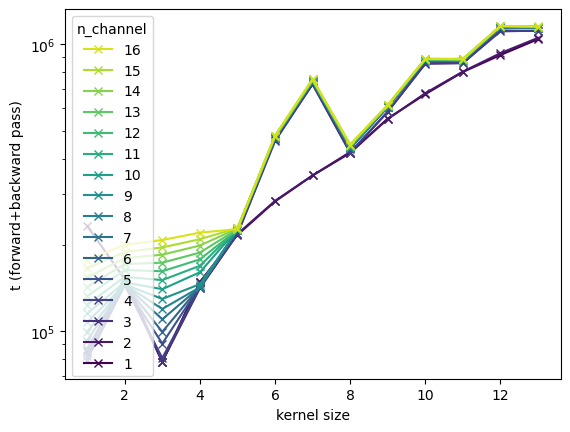

In [44]:
color = times_dict["channel_sizes"]
y = times_dict["conv_backprop_times"]
x = times_dict["kernel_sizes"]
cm = plt.colormaps.get_cmap("viridis")
custom_cycler = (plt.cycler(color=[cm(k/len(color)) for k in range(len(color))]))
plt.rc('axes', prop_cycle=custom_cycler)
plt.plot(x, y, marker='x')
plt.xlabel("kernel size")
plt.ylabel("t (forward+backward pass)")
plt.legend(color, title="n_channel", loc="upper left", reverse=True)
plt.yscale("log")
plt.show()

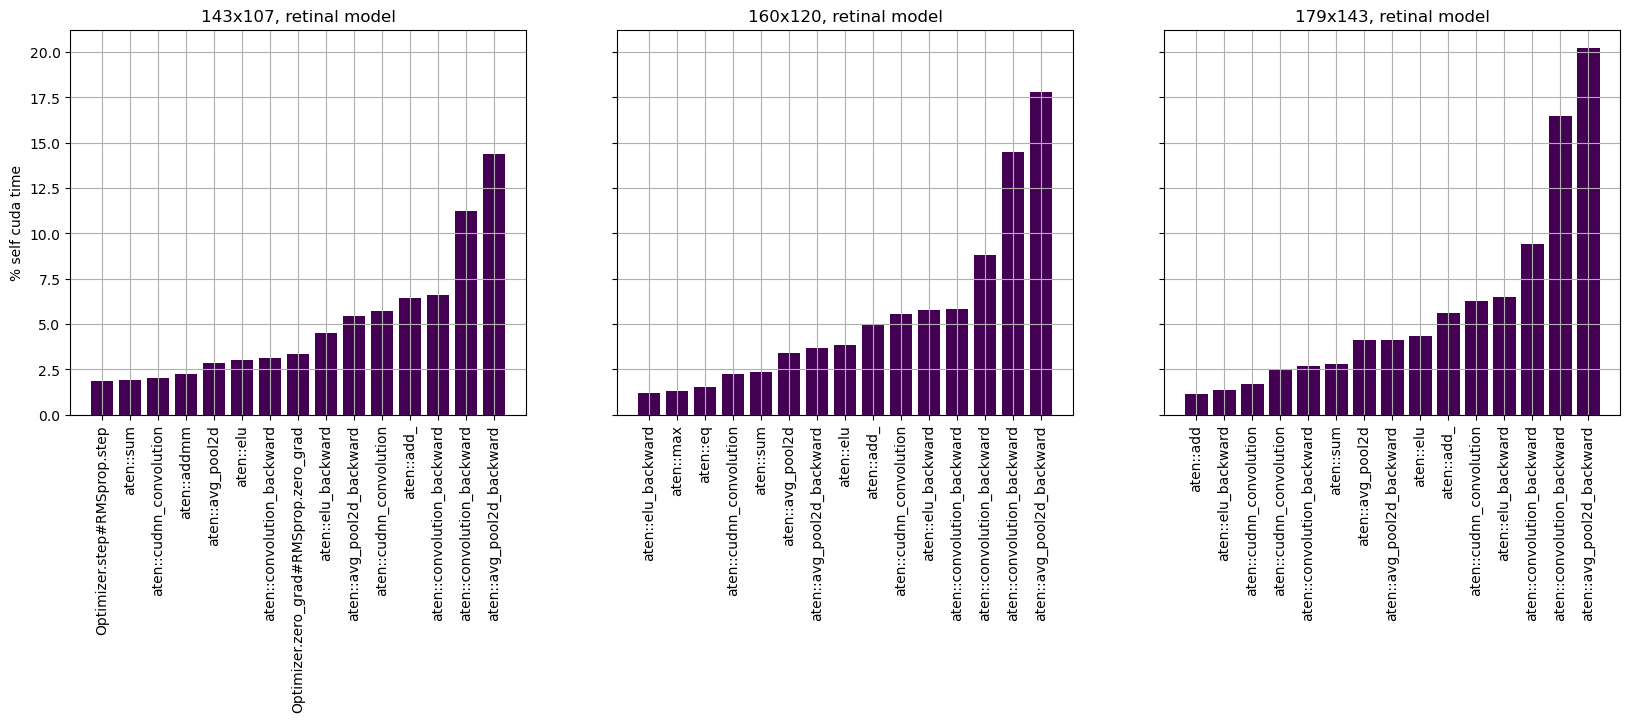

In [45]:
#143x107
names0 = ["aten::avg_pool2d_backward",
           "aten::convolution_backward",
           "aten::convolution_backward",
                           "aten::add_",
              "aten::cudnn_convolution",
            "aten::avg_pool2d_backward",
                   "aten::elu_backward",
"Optimizer.zero_grad#RMSprop.zero_grad",
           "aten::convolution_backward",
                            "aten::elu",
                     "aten::avg_pool2d",
                          "aten::addmm",
              "aten::cudnn_convolution",
                            "aten::sum",
          "Optimizer.step#RMSprop.step"][::-1]

times0 = [14.38,
11.22,
 6.62,
 6.41,
 5.73,
 5.44,
 4.52,
 3.34,
 3.14,
 3.03,
 2.84,
 2.27,
 2.03,
 1.90,
 1.87][::-1]

names1 = ["aten::avg_pool2d_backward",
"aten::convolution_backward",
"aten::convolution_backward",
"aten::convolution_backward",
"aten::elu_backward",
"aten::cudnn_convolution",
"aten::add_",
"aten::elu",
"aten::avg_pool2d_backward",
"aten::avg_pool2d",
"aten::sum",
"aten::cudnn_convolution",
"aten::eq",
"aten::max",
"aten::elu_backward"][::-1]
times1 = [17.80,
14.51,
 8.80,
 5.81,
 5.77,
 5.57,
 4.93,
 3.86,
 3.70,
 3.42,
 2.37,
 2.26,
 1.50,
 1.31,
 1.20][::-1]
names2 = ["aten::avg_pool2d_backward",
"aten::convolution_backward",
"aten::convolution_backward", 
"aten::elu_backward", 
"aten::cudnn_convolution", 
"aten::add_", 
"aten::elu", 
"aten::avg_pool2d_backward", 
"aten::avg_pool2d", 
"aten::sum", 
"aten::convolution_backward", 
"aten::cudnn_convolution", 
"aten::cudnn_convolution", 
"aten::elu_backward", 
"aten::add"][::-1]
times2 = [20.23,
16.50,
9.41,
6.51,
6.25,
5.62,
4.36,
4.14,
4.14,
2.80,
2.71,
2.51,
1.67,
1.34,
1.14][::-1]

fig, axes = plt.subplots(1,3, figsize=(20,5), sharey=True)
pos = np.arange(len(times0))
axes[0].bar(pos, times0)
axes[0].grid()
axes[0].set_xticks(pos, names0, rotation=90)
axes[0].set_ylabel("% self cuda time")
axes[0].set_title("143x107, retinal model")
axes[1].grid()
axes[1].bar(pos, times1)
axes[1].set_xticks(pos, names1, rotation=90)
axes[1].set_title("160x120, retinal model")
axes[2].grid()
axes[2].bar(pos, times2)
axes[2].set_xticks(pos, names2, rotation=90)
axes[2].set_title("179x143, retinal model")
plt.show()

In [46]:
names2 = ["aten::avg_pool2d_backward",
"aten::convolution_backward",
"aten::convolution_backward", 
"aten::elu_backward", 
"aten::cudnn_convolution", 
"aten::add",_ 
"aten::elu", 
"aten::avg_pool2d_backward", 
"aten::avg_pool2d", 
"aten::sum", 
"aten::convolution_backward", 
"aten::cudnn_convolution", 
"aten::cudnn_convolution", 
"aten::elu_backward", 
"aten::add",
"aten::avg_pool2d"][::-1]
times2 = [20.23,
16.50,
9.41,
6.51,
6.25,
5.62,
4.36,
4.14,
4.14,
2.80,
2.71,
2.51,
1.67,
1.34,
1.14,
0.90,][::-1]

pos = np.arange(len(times))
plt.barh(pos, times)
plt.yticks(pos, names)
plt.xlabel(", self cuda time")
plt.title("143x107, retinal model")
plt.show()

SyntaxError: invalid syntax (392757001.py, line 7)